<a href="https://colab.research.google.com/github/Anoshawott/Foundations-of-Business-Analytics-QBUS1040/blob/master/QBUS1040_datafitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize the data

There are 10 attributes in the data set. For simplicity and visualization purpose, we choose to investigate the relationship between average blood pressure (the fourth column in $X$) and a quantitative measure of disease progression one year after baseline ($y$). To visualize the relationship, we draw a scatter plot.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print('# of observations (N) and # of each observation\'s attributes (n) are',diabetes.data.shape)
print('# of responses (N) is',diabetes.target.shape)

# of observations (N) and # of each observation's attributes (n) are (442, 10)
# of responses (N) is (442,)


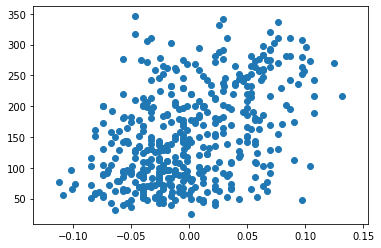

In [0]:
x = diabetes.data[:,3]
y = diabetes.target
# Plot the data
plt.scatter(x,y)

# Define functions we need

We will need some functions from previous tutorials.

_To improve readability of the code, we use $\hat{\theta} = A^{\dagger} y$ in the function `polyfit` instead of the usual `solve_via_backsub` function which solves the least square problem via back substitution and QR factorization._

In [0]:
def vandermonde(t,n):
    m=len(t)
    V=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            V[i,j]=t[i]**j
    return V

# Fits the coefficients by solving a least square problem: given A and y, returns a list of coefficients
def polyfit(A,y):
    return np.matmul(np.linalg.pinv(A), y)


# Calaulate the estimated value of y, given A and theta_hat
def polyeval(A,theta_hat):
    return np.matmul(A,theta_hat)


# Calaulate the RMS, given observed value y and estimated value y_hat
def RMSE(y,y_hat):
    return np.linalg.norm(y-y_hat)/len(y)**0.5

# Data fitting

Here we are trying to fit a straight-model (degree 1 polynomial).

In [0]:
# Say we try to fit a straight-line model
deg = 1
p = deg+1
# Construct the matrix A
A = vandermonde(x,p)

# Split into 13 folds, simply because 442 is exactly divisible by 13
N = len(y)
K = 13
idx = np.arange(N) # idx = (0,1,2,...,441)
splited_idx = np.split(idx,13) #splited_idx is 13 list of indices

# Construct skeletons to record coefficients for each test dataset, RMS of training dataset and RMS of test dataset 
thetas = np.zeros((K,A.shape[1]))
RMSE_train = np.zeros(K)
RMSE_test = np.zeros(K)
# loop on each fold as test dataset
for k in range(K):
    test_index = splited_idx[k]
    train_index = np.delete(idx,splited_idx[k])
    A_train,A_test = A[train_index],A[test_index]
    y_train,y_test = y[train_index],y[test_index]
    # Calculate the coefficients of this fold from the training dataset
    thetas[k] = polyfit(A_train,y_train)
    # Calculate and record the estimated value of training dataset and RMS
    y_train_hat = polyeval(A_train,thetas[k])
    RMSE_train[k] = RMSE(y_train,y_train_hat)
    # Calculate and record the estimated value of test dataset and RMS
    y_test_hat = polyeval(A_test,thetas[k])
    RMSE_test[k] = RMSE(y_test,y_test_hat)
print('RMS of training dataset for fold 1 to 13:')
print(RMSE_train)
print('RMS of testing dataset for fold 1 to 13:')
print(RMSE_test)
print('Parameter Estimates for fold 1 to 13:')
print(thetas)

RMS of training dataset for fold 1 to 13:
[69.1724907  69.56414687 68.78967867 69.27722831 68.5379831  69.4745732
 68.92751497 68.17729238 68.73039031 69.58136715 69.05124991 68.69236012
 70.08170144]
RMS of testing dataset for fold 1 to 13:
[68.1821692  63.32439848 73.26349678 67.25858436 75.57353121 64.47008088
 71.13892204 79.34780514 73.38256123 63.08430063 69.70494388 73.79016929
 56.09899214]
Parameter Estimates for fold 1 to 13:
[[152.40975558 723.92266317]
 [153.26614262 714.17439741]
 [153.50341063 761.40497728]
 [150.4647709  691.27888101]
 [151.35837638 696.60803357]
 [153.0008079  726.21171796]
 [152.58781233 729.89340838]
 [152.15232765 695.89271772]
 [151.5894025  702.77447555]
 [151.29238345 728.897221  ]
 [151.36618835 702.11596272]
 [151.5118841  717.99697175]
 [153.15906591 698.85471544]]
